In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from my_functions import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from itertools import groupby

In [310]:
df_prep = pd.read_csv("..\chapter3\gasometry_prepared_data.csv")
cols=["BETET",	"CO2TET",	"HCO3ACTE",	"HCO3STTE",	"O2SATTET",	"O2TET", "IONH"]
my_blue="#0064B2";
my_red="#D61600";

In [311]:
cols2=["BETET",	"CO2TET",	"O2TET", "IONH"]
df_miernik=df_prep[cols2]
vars1=["BETET", "O2TET"]
vars2=["IONH", "CO2TET"]

#wyliczenie wartości poza normą świadczące o zakwaszeniu organizmu
df_miernik[["BETET_neg", "O2TET_neg"]]=df_miernik[vars1].applymap(lambda x: 0 if x >= 0 else abs(x))
df_miernik[["IONH_neg", "CO2TET_neg"]]=df_miernik[vars2].applymap(lambda x: 0 if x <= 1 else x-1)
#wszystkie odchylenia od normy
df_miernik[["BETET_all", "O2TET_all"]] = df_miernik[vars1].applymap(lambda x: 0 if (x >= 0) and (x <= 1) else (abs(x) if x < 0 else x - 1))
df_miernik[["IONH_all", "CO2TET_all"]] = df_miernik[vars2].applymap(lambda x: 0 if (x >= 0) and (x <= 1) else (abs(x) if x < 0 else x - 1))
col_neg=["BETET_neg", "O2TET_neg", "CO2TET_neg", "IONH_neg"]
col_all=["BETET_all", "O2TET_all", "IONH_all", "CO2TET_all"]

C:\Users\dorot\AppData\Local\Temp\ipykernel_56972\3342695902.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\dorot\AppData\Local\Temp\ipykernel_56972\3342695902.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dorot\AppData\Local\Temp\ipykernel_56972\3342695902.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dorot\AppData\Local\Temp\ipykernel_56972\3342695902.py:8: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFram

In [312]:
df_prep

,Unnamed: 0,PACJENT_NR,BADANIE_NR,BETET,CO2TET,HCO3ACTE,HCO3STTE,O2SATTET,O2TET,IONH,ZGON
0,0,1,1,0.326087,2.21,0.850000,0.225,-2.48,-0.720,1.882698,0.0
1,1,1,2,0.086957,5.22,0.866667,0.200,0.86,4.880,3.297125,0.0
2,2,1,3,0.760870,3.10,1.250000,0.800,0.92,6.000,2.201643,0.0
3,3,1,4,0.869565,2.75,1.266667,0.675,0.62,1.440,1.882698,0.0
4,4,1,5,0.608696,2.61,1.083333,0.725,0.82,2.800,1.970160,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2929,2929,145,5,-0.717391,1.63,0.133333,-0.350,0.18,0.420,2.294287,1.0
2930,2930,145,6,-0.891304,1.39,-0.016667,-0.450,0.76,1.640,2.254399,1.0
2931,2931,145,7,-1.065217,1.71,-0.050000,-0.650,-0.06,0.316,2.708690,1.0
2932,2932,145,8,-0.695652,1.15,0.066667,-0.275,0.62,1.600,1.857967,1.0


In [9]:
df_miernik=pd.concat([df_prep[["PACJENT_NR", "BADANIE_NR", "ZGON"]], df_miernik], axis=1) 

NameError: name 'pd' is not defined

In [24]:
df_miernik

,PACJENT_NR,BADANIE_NR,ZGON,BETET,CO2TET,O2TET,IONH,BETET_neg,O2TET_neg,IONH_neg,CO2TET_neg,BETET_all,O2TET_all,IONH_all,CO2TET_all
0,1,1,0.0,0.326087,2.21,-0.720,1.882698,0.000000,0.72,0.882698,1.21,0.000000,0.72,0.882698,1.21
1,1,2,0.0,0.086957,5.22,4.880,3.297125,0.000000,0.00,2.297125,4.22,0.000000,3.88,2.297125,4.22
2,1,3,0.0,0.760870,3.10,6.000,2.201643,0.000000,0.00,1.201643,2.10,0.000000,5.00,1.201643,2.10
3,1,4,0.0,0.869565,2.75,1.440,1.882698,0.000000,0.00,0.882698,1.75,0.000000,0.44,0.882698,1.75
4,1,5,0.0,0.608696,2.61,2.800,1.970160,0.000000,0.00,0.970160,1.61,0.000000,1.80,0.970160,1.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,145,5,1.0,-0.717391,1.63,0.420,2.294287,0.717391,0.00,1.294287,0.63,0.717391,0.00,1.294287,0.63
2930,145,6,1.0,-0.891304,1.39,1.640,2.254399,0.891304,0.00,1.254399,0.39,0.891304,0.64,1.254399,0.39
2931,145,7,1.0,-1.065217,1.71,0.316,2.708690,1.065217,0.00,1.708690,0.71,1.065217,0.00,1.708690,0.71
2932,145,8,1.0,-0.695652,1.15,1.600,1.857967,0.695652,0.00,0.857967,0.15,0.695652,0.60,0.857967,0.15


In [43]:
df_miernik.columns

Index(['PACJENT_NR', 'BADANIE_NR', 'ZGON', 'BETET', 'CO2TET', 'O2TET', 'IONH',
       'BETET_neg', 'O2TET_neg', 'IONH_neg', 'CO2TET_neg', 'BETET_all',
       'O2TET_all', 'IONH_all', 'CO2TET_all'],
      dtype='object')

In [37]:
cols=['BETET_all', 'O2TET_all', 'IONH_all', 'CO2TET_all']

In [313]:

X_data=df_miernik[cols].reset_index(drop=True)
y_data=df_miernik["ZGON"]

pca = PCA(n_components=3)
components = pca.fit_transform(X_data)

components_df = pd.DataFrame(components, columns=['Czynnik 1', 'Czynnik 2', "Czynnik 3"])

train_data_reset_index = df_miernik.reset_index(drop=True)
components_df_reset_index = components_df.reset_index(drop=True)

merged_data = pd.concat([train_data_reset_index, components_df_reset_index], axis=1)
merged_data

pca.explained_variance_ratio_.sum()
pca.explained_variance_ratio_


KeyError: "['HCO3ACTE', 'HCO3STTE', 'O2SATTET'] not in index"

In [39]:
merged_data['ZGON'] = merged_data['ZGON'].astype(str)
merged_data['Czy pacjent zmarł?'] = merged_data['ZGON'].map({'1.0': 'tak', '0.0': 'nie'})

fig = px.scatter_3d(merged_data, x='Czynnik 1', y='Czynnik 2', z='Czynnik 3', color='Czy pacjent zmarł?', size_max=18, opacity=0.5)
fig.update_traces(textposition='top center', marker_size=6)

fig.update_layout(
    scene=dict(
        xaxis=dict(tickfont=dict(size=14)),
        yaxis=dict(tickfont=dict(size=14)),
        zaxis=dict(tickfont=dict(size=14)),
    )
)

fig.update_layout(legend=dict(font=dict(size=14)), legend_title=dict(font=dict(size=14)))
fig.update_layout(template="plotly_white")
fig.show()


In [21]:
# Podziel dane na dwie ramki danych
df_zgon_0 = df_miernik[df_miernik['ZGON'] == 0]
df_zgon_1 = df_miernik[df_miernik['ZGON'] == 1]

# fig0 = make_subplots(rows=1, cols=2, subplot_titles=['Zgon: nie', 'Zgon: tak'])
# Wykres dla ZGON=0
fig1 = px.line(df_zgon_0, x='BADANIE_NR', y="BETET_neg", color='PACJENT_NR', 
              labels={'BADANIE_NR': 'BADANIE_NR', "BETET_neg": 'Miernik', 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig1.update_xaxes(title_text='Numer badania')
fig1.update_yaxes(title_text='Betet neg')
fig1.update_layout(showlegend=False)

# Wykres dla ZGON=1
fig2 = px.line(df_zgon_1, x='BADANIE_NR', y="BETET_neg", color='PACJENT_NR', 
               labels={'BADANIE_NR': 'BADANIE_NR', "BETET_neg": 'Miernik', 'PACJENT_NR': 'Pacjent'}, width=800, height=800)
fig2.update_xaxes(title_text='Numer badania')
fig2.update_yaxes(title_text="BETET_neg")
fig2.update_layout(showlegend=False)

fig1.update_yaxes(range=[0, 3])
fig2.update_yaxes(range=[0, 3])

# fig1.update_xaxes(range=[0, 65])
# fig2.update_xaxes(range=[0, 65])

fig1.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=20),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=20)
    )
)
fig2.update_layout(
    xaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=24),
    ),
    yaxis=dict(
        tickfont=dict(size=18),
        title_font=dict(size=24)
    )
)
fig1.update_layout(template="plotly_white")
fig2.update_layout(template="plotly_white")
# Wyświetl oba wykresy
fig1.show()
fig2.show()
# fig1.write_image("images4/"+"miernik_pacjenci_wyleczeni"+ ".png", width=1000, height=800, scale=4, format="png")
# fig2.write_image("images4/"+"miernik_pacjenci_zmarli"+ ".png", width=1000, height=800, scale=4, format="png")
# fig1.write_html("images4/miernik_pacjenci_wyleczeni.html")
# fig2.write_html("images4/miernik_pacjenci_zmarli.html")


In [127]:
df=df_miernik

cols=['PACJENT_NR', 'BETET', 'CO2TET', 'O2TET', 'IONH']
       # 'BETET_neg', 'O2TET_neg', 'IONH_neg', 'CO2TET_neg', 'BETET_all',
       # 'O2TET_all', 'IONH_all', 'CO2TET_all']

In [128]:
def rle(data):
  x = [len(list(y)) for x, y in groupby(data) if x==True]
  if x==[]:
    return 0
  return max(x)

In [129]:
df_mean = df[cols].groupby('PACJENT_NR').mean().add_suffix('_mean')
df_min = df[cols].groupby('PACJENT_NR').min().add_suffix('min')
df_max = df[cols].groupby('PACJENT_NR').max().add_suffix('max')
df_med = df[cols].groupby('PACJENT_NR').median().add_suffix('median')
df_size = df[['PACJENT_NR', 'BADANIE_NR']].groupby('PACJENT_NR').count().add_suffix('_size')
df_std = df[cols].groupby('PACJENT_NR').std().add_suffix('_std')
df_sum = df[cols].groupby('PACJENT_NR').sum().add_suffix('_sum')

df_g1=pd.concat([df["PACJENT_NR"], df[["BETET", "IONH", "O2TET", "CO2TET"]].apply(lambda col: np.where(col > 1, 1, 0))], axis=1)
df_g1=df_g1.groupby("PACJENT_NR").sum().add_suffix('_greater')

df_l0=pd.concat([df["PACJENT_NR"], df[["BETET", "IONH", "O2TET", "CO2TET"]].apply(lambda col: np.where(col < 0, 1, 0))], axis=1)
df_l0=df_l0.groupby("PACJENT_NR").sum().add_suffix('_less')

df_rzad_pom_ups=pd.concat([df["PACJENT_NR"],df[["BETET", "IONH", "O2TET", "CO2TET"]]>1], axis=1)
df_rzad_ups=df_rzad_pom_ups.groupby("PACJENT_NR").agg(rle).add_suffix('_row_ups')

df_rzad_pom_downs=pd.concat([df["PACJENT_NR"],df[["BETET", "IONH", "O2TET", "CO2TET"]]<0], axis=1)
df_rzad_downs=df_rzad_pom_downs.groupby("PACJENT_NR").agg(rle).add_suffix('_row_downs')

df_zgon = df[['PACJENT_NR', 'ZGON']].groupby('PACJENT_NR').first()

df_list = [df_mean, df_min, df_max, df_med, df_size, df_std, df_sum, df_g1, df_l0, df_rzad_ups, df_rzad_downs, df_zgon]
df_all = pd.concat(df_list, axis=1)

In [130]:
df_all

,BETET_mean,CO2TET_mean,O2TET_mean,IONH_mean,BETETmin,CO2TETmin,O2TETmin,IONHmin,BETETmax,CO2TETmax,...,CO2TET_less,BETET_row_ups,IONH_row_ups,O2TET_row_ups,CO2TET_row_ups,BETET_row_downs,IONH_row_downs,O2TET_row_downs,CO2TET_row_downs,ZGON
PACJENT_NR,,,,,,,,,,,,,,,,,,,,,
1,3.212790,2.045905,1.268800,0.298544,0.086957,0.93,-0.772,-0.869732,6.260870,5.22,...,0,31,6,17,29,0,15,2,0,0.0
2,1.332609,2.621000,0.876400,1.277291,-0.043478,0.92,-0.372,-0.249127,2.304348,3.73,...,0,6,6,1,9,1,1,1,0,0.0
3,2.179745,1.298780,1.601659,0.061299,0.478261,-0.10,-0.256,-0.615968,4.086957,3.03,...,1,31,1,4,14,0,4,1,1,0.0
4,1.605499,1.240588,1.216824,0.285039,-0.065217,-0.57,-1.236,-0.602656,3.500000,3.45,...,3,18,3,5,11,1,13,2,3,0.0
6,0.478261,0.240000,0.128500,0.241079,-0.043478,-0.61,-1.744,-0.416812,0.847826,1.55,...,3,0,0,1,1,1,1,5,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3.311141,2.177945,0.866000,0.273734,0.652174,0.84,-0.528,-0.655539,5.347826,3.28,...,0,30,2,5,21,0,3,4,0,0.0
140,2.571558,1.514167,0.157667,0.224314,-0.347826,1.06,-1.052,-0.548791,3.934783,1.99,...,0,20,1,3,24,1,7,3,0,1.0
142,2.884058,3.144762,1.041524,1.053976,0.391304,1.90,-0.500,-0.158050,4.565217,6.05,...,0,18,6,5,21,0,1,2,0,0.0


In [285]:
X=df_all.drop(columns=["ZGON"]).reset_index(drop=True)
y=df_all["ZGON"]

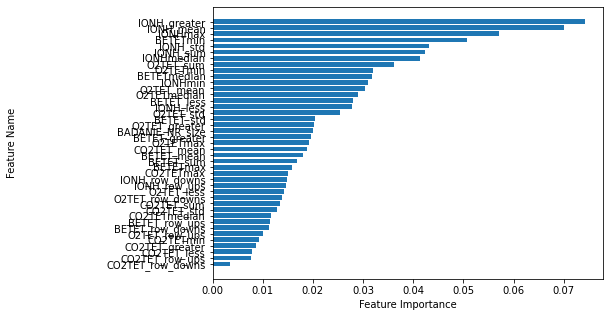

In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicjalizacja modelu Lasu Losowego
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Trenowanie modelu
rf_classifier.fit(X_train, y_train)

# Wybór najbardziej istotnych cech
wartosci = rf_classifier.feature_importances_
kategorie=X.columns

niezerowe_wartosci = [x for x in wartosci if x != 0]
niezerowe_kategorie = [kategorie[i] for i, x in enumerate(wartosci) if x != 0]

#sortowanie
sorted_niezerowe_wartosci, sorted_niezerowe_kategorie = zip(*sorted(zip(niezerowe_wartosci, niezerowe_kategorie), reverse=False))

# Tworzenie wykresu słupkowego z niezerowymi wartościami
fig, ax = plt.subplots(figsize=(7,5))
plt.barh(sorted_niezerowe_kategorie, sorted_niezerowe_wartosci)

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
ax.yaxis.set_label_coords(-0.5, 0.5)
plt.show()

In [287]:
# Indeksy najbardziej istotnych cech
most_important_indices = wartosci.argsort()[-10:][::-1]  # wybierz 10 najbardziej istotnych cech

# Wydrukuj nazwy kolumn i ich istotność
for idx in most_important_indices:
    print(f"{X.columns[idx]}: {wartosci[idx]}")

IONH_greater: 0.07415051972666041
IONH_mean: 0.07008864791336192
IONHmax: 0.057060561751720904
BETETmin: 0.05067073414936043
IONH_std: 0.04306167329734612
IONH_sum: 0.042437639309923524
IONHmedian: 0.041309766436697835
O2TET_sum: 0.036151581360305114
O2TETmin: 0.03193792548473928
BETETmedian: 0.031772347433630735


In [288]:
y_pred = rf_classifier.predict(X_test)

# Obliczenie dokładności klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji:", accuracy)

# Obliczenie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMacierz pomyłek:")
print(conf_matrix)

Dokładność klasyfikacji: 0.8636363636363636

Macierz pomyłek:
[[11  3]
 [ 0  8]]


In [135]:
df_miernik

,PACJENT_NR,BADANIE_NR,ZGON,BETET,CO2TET,O2TET,IONH,BETET_neg,O2TET_neg,IONH_neg,CO2TET_neg,BETET_all,O2TET_all,IONH_all,CO2TET_all
0,1,1,0.0,0.326087,2.21,-0.720,1.882698,0.000000,0.72,0.882698,1.21,0.000000,0.72,0.882698,1.21
1,1,2,0.0,0.086957,5.22,4.880,3.297125,0.000000,0.00,2.297125,4.22,0.000000,3.88,2.297125,4.22
2,1,3,0.0,0.760870,3.10,6.000,2.201643,0.000000,0.00,1.201643,2.10,0.000000,5.00,1.201643,2.10
3,1,4,0.0,0.869565,2.75,1.440,1.882698,0.000000,0.00,0.882698,1.75,0.000000,0.44,0.882698,1.75
4,1,5,0.0,0.608696,2.61,2.800,1.970160,0.000000,0.00,0.970160,1.61,0.000000,1.80,0.970160,1.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,145,5,1.0,-0.717391,1.63,0.420,2.294287,0.717391,0.00,1.294287,0.63,0.717391,0.00,1.294287,0.63
2930,145,6,1.0,-0.891304,1.39,1.640,2.254399,0.891304,0.00,1.254399,0.39,0.891304,0.64,1.254399,0.39
2931,145,7,1.0,-1.065217,1.71,0.316,2.708690,1.065217,0.00,1.708690,0.71,1.065217,0.00,1.708690,0.71
2932,145,8,1.0,-0.695652,1.15,1.600,1.857967,0.695652,0.00,0.857967,0.15,0.695652,0.60,0.857967,0.15


In [5]:
from tsfresh import extract_features

In [8]:
columns_to_extract = ['BETET', 'CO2TET', 'O2TET', 'IONH',
       'BETET_neg', 'O2TET_neg', 'IONH_neg', 'CO2TET_neg', 'BETET_all',
       'O2TET_all', 'IONH_all', 'CO2TET_all']

# Ekstrakcja cech za pomocą tsfresh
extracted_features = extract_features(df_miernik, column_id='PACJENT_NR', column_sort='BADANIE_NR', column_value="IONH_neg")
extracted_features_BE = extract_features(df_miernik, column_id='PACJENT_NR', column_sort='BADANIE_NR', column_value="BETET_neg")


NameError: name 'df_miernik' is not defined

In [3]:
extracted_features.shape()

NameError: name 'extracted_features' is not defined

In [290]:
extracted_features_O2 = extract_features(df_miernik, column_id='PACJENT_NR', column_sort='BADANIE_NR', column_value="O2TET_neg")
extracted_features_CO2 = extract_features(df_miernik, column_id='PACJENT_NR', column_sort='BADANIE_NR', column_value="CO2TET_neg")

Feature Extraction: 100%|██████████| 18/18 [00:05<00:00,  3.26it/s]


In [240]:
extracted_features["IONH_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"max\""]

1     -0.094670
2     -1.239295
3     -0.000544
4      0.036399
6      0.000000
         ...   
139   -0.066088
140   -0.250880
142   -0.202498
144   -1.289729
145    0.414403
Name: IONH_neg__agg_linear_trend__attr_"slope"__chunk_len_5__f_agg_"max", Length: 107, dtype: float64

In [291]:
extracted_features_samp=pd.concat([extracted_features[["IONH_neg__first_location_of_maximum", "IONH_neg__first_location_of_minimum", "IONH_neg__last_location_of_maximum", "IONH_neg__last_location_of_minimum", "IONH_neg__number_peaks__n_3", "IONH_neg__number_peaks__n_5", "IONH_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"max\"", "IONH_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"mean\""]],
                                    extracted_features_BE[["BETET_neg__first_location_of_maximum", "BETET_neg__first_location_of_minimum", "BETET_neg__last_location_of_maximum", "BETET_neg__last_location_of_minimum", "BETET_neg__number_peaks__n_3", "BETET_neg__number_peaks__n_5", "BETET_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"max\"", "BETET_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"mean\""]],
                                    extracted_features_O2[["O2TET_neg__first_location_of_maximum", "O2TET_neg__first_location_of_minimum", "O2TET_neg__last_location_of_maximum", "O2TET_neg__last_location_of_minimum", "O2TET_neg__number_peaks__n_3", "O2TET_neg__number_peaks__n_5", "O2TET_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"max\"", "O2TET_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"mean\""]],
                                    extracted_features_CO2[["CO2TET_neg__first_location_of_maximum", "CO2TET_neg__first_location_of_minimum", "CO2TET_neg__last_location_of_maximum", "CO2TET_neg__last_location_of_minimum", "CO2TET_neg__number_peaks__n_3", "CO2TET_neg__number_peaks__n_5", "CO2TET_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"max\"", "CO2TET_neg__agg_linear_trend__attr_\"slope\"__chunk_len_5__f_agg_\"mean\""]]
                                    ], axis=1)

extracted_features_samp

,IONH_neg__first_location_of_maximum,IONH_neg__first_location_of_minimum,IONH_neg__last_location_of_maximum,IONH_neg__last_location_of_minimum,IONH_neg__number_peaks__n_3,IONH_neg__number_peaks__n_5,"IONH_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","IONH_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""mean""",BETET_neg__first_location_of_maximum,BETET_neg__first_location_of_minimum,...,"O2TET_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","O2TET_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""mean""",CO2TET_neg__first_location_of_maximum,CO2TET_neg__first_location_of_minimum,CO2TET_neg__last_location_of_maximum,CO2TET_neg__last_location_of_minimum,CO2TET_neg__number_peaks__n_3,CO2TET_neg__number_peaks__n_5,"CO2TET_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","CO2TET_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""mean"""
1,0.020000,0.120000,0.040000,1.000000,2.0,1.0,-0.094670,-0.061885,0.000000,0.000000,...,0.006715,0.007224,0.020000,0.400000,0.040000,0.420000,4.0,1.0,-0.071512,-0.027726
2,0.000000,0.600000,0.100000,1.000000,0.0,0.0,-1.239295,-0.926254,0.000000,0.100000,...,-0.372000,-0.074400,0.200000,0.900000,0.300000,1.000000,0.0,0.0,-0.970000,-0.962000
3,0.000000,0.024390,0.024390,1.000000,0.0,0.0,-0.000544,-0.000109,0.000000,0.000000,...,-0.002733,-0.001160,0.536585,0.341463,0.560976,1.000000,6.0,3.0,-0.184500,-0.118133
4,0.823529,0.000000,0.852941,1.000000,1.0,1.0,0.036399,0.016678,0.705882,0.000000,...,0.116429,0.028536,0.823529,0.088235,0.852941,0.676471,1.0,1.0,0.228929,0.169411
6,0.000000,0.000000,1.000000,1.000000,0.0,0.0,0.000000,0.000000,0.750000,0.000000,...,-1.596000,-0.773067,0.375000,0.000000,0.500000,1.000000,1.0,0.0,-0.550000,-0.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.031250,0.062500,0.062500,1.000000,0.0,0.0,-0.066088,-0.014062,0.000000,0.000000,...,0.039286,0.018300,0.250000,0.125000,0.406250,0.843750,3.0,0.0,-0.044643,0.056857
140,0.000000,0.041667,0.041667,1.000000,0.0,0.0,-0.250880,-0.075793,0.000000,0.041667,...,-0.002400,0.001000,0.291667,0.708333,0.333333,0.750000,2.0,1.0,-0.064000,-0.033500
142,0.809524,0.285714,0.857143,0.904762,1.0,0.0,-0.202498,-0.133243,0.000000,0.000000,...,-0.032000,-0.004560,0.809524,0.571429,0.857143,0.619048,2.0,0.0,0.280000,0.210000
144,0.000000,0.909091,0.090909,1.000000,0.0,0.0,-1.289729,-0.744192,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.090909,0.090909,0.181818,0.0,0.0,-1.180000,-0.531000


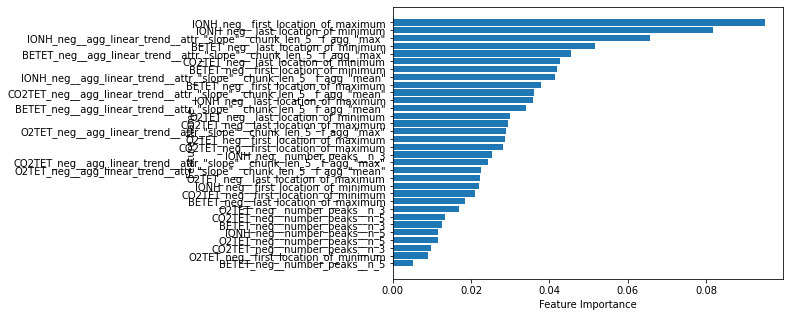

In [300]:
# Podział danych na zbiór treningowy i testowy

X_train, X_test, y_train, y_test = train_test_split(extracted_features_samp, y, test_size=0.2, random_state=42)

# Inicjalizacja modelu Lasu Losowego
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Trenowanie modelu
rf_classifier.fit(X_train, y_train)

# Wybór najbardziej istotnych cech
wartosci = rf_classifier.feature_importances_
kategorie=extracted_features_samp.columns

niezerowe_wartosci = [x for x in wartosci if x != 0]
niezerowe_kategorie = [kategorie[i] for i, x in enumerate(wartosci) if x != 0]

#sortowanie
sorted_niezerowe_wartosci, sorted_niezerowe_kategorie = zip(*sorted(zip(niezerowe_wartosci, niezerowe_kategorie), reverse=False))

# Tworzenie wykresu słupkowego z niezerowymi wartościami
fig, ax = plt.subplots(figsize=(7,5))
plt.barh(sorted_niezerowe_kategorie, sorted_niezerowe_wartosci)

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
ax.yaxis.set_label_coords(-0.5, 0.5)
plt.show()

In [293]:
y_pred = rf_classifier.predict(X_test)

# Obliczenie dokładności klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji:", accuracy)

# Obliczenie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMacierz pomyłek:")
print(conf_matrix)

Dokładność klasyfikacji: 0.9545454545454546

Macierz pomyłek:
[[13  1]
 [ 0  8]]


In [217]:
X_test.index

Index([103,  16,   6, 132,  95,  88,  46,  62, 124,  17, 105,  67,   1, 106,
        27, 144,  76, 104,  86,  59,  18,  52,  90,  37,  31,  47,  77, 127,
        22,  61, 119, 118,  12],
      dtype='int64')

In [ ]:
#zbadaj dokładność na zbiorze testowym gdy idziemy krok po kroku
#czy trenować za każdym razem? czy używać jednego modelu dla całości

In [307]:

X_data=X_train
y_data=y_train

pca = PCA(n_components=3)
components = pca.fit_transform(X_data)

X_test=pca.transform(X_test)
components_df = pd.DataFrame(components, columns=['Czynnik 1', 'Czynnik 2', "Czynnik 3"])

train_data_reset_index = X_train.reset_index(drop=True)
components_df_reset_index = components_df.reset_index(drop=True)
ZGON=y_train.reset_index(drop=True)

merged_data = pd.concat([train_data_reset_index, components_df_reset_index, ZGON], axis=1)
merged_data

# pca.explained_variance_ratio_.sum()
# pca.explained_variance_ratio_
pd.DataFrame(pca.components_, columns=X_train.columns)

,IONH_neg__first_location_of_maximum,IONH_neg__first_location_of_minimum,IONH_neg__last_location_of_maximum,IONH_neg__last_location_of_minimum,IONH_neg__number_peaks__n_3,IONH_neg__number_peaks__n_5,"IONH_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","IONH_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""mean""",BETET_neg__first_location_of_maximum,BETET_neg__first_location_of_minimum,...,"O2TET_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","O2TET_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""mean""",CO2TET_neg__first_location_of_maximum,CO2TET_neg__first_location_of_minimum,CO2TET_neg__last_location_of_maximum,CO2TET_neg__last_location_of_minimum,CO2TET_neg__number_peaks__n_3,CO2TET_neg__number_peaks__n_5,"CO2TET_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""max""","CO2TET_neg__agg_linear_trend__attr_""slope""__chunk_len_5__f_agg_""mean"""
0,-0.009065,-0.006007,-0.060744,0.024964,0.281309,0.233257,-0.018179,-0.028026,-0.023667,-0.012546,...,-0.017130,-0.007611,0.012717,0.005011,-0.023348,-0.005621,0.566284,0.349096,-0.022059,-0.011825
1,0.020364,0.023091,-0.013208,-0.016440,0.266363,0.050559,-0.115532,-0.032197,-0.008651,0.021511,...,-0.026532,-0.008206,-0.017158,0.003233,-0.052469,-0.018835,0.532384,0.177453,-0.175038,-0.062138
2,0.205253,-0.020746,0.185828,-0.051195,0.343746,0.219969,0.405315,0.207531,0.139370,0.000296,...,0.053896,0.015046,0.182141,-0.060006,0.166842,-0.075765,0.008367,-0.044054,0.563673,0.294839


In [295]:
merged_data['ZGON'] = merged_data['ZGON'].astype(str)
merged_data['Czy pacjent zmarł?'] = merged_data['ZGON'].map({'1.0': 'tak', '0.0': 'nie'})

fig = px.scatter_3d(merged_data, x='Czynnik 1', y='Czynnik 2', z='Czynnik 3', color='Czy pacjent zmarł?', size_max=18, opacity=0.5)
fig.update_traces(textposition='top center', marker_size=6)

fig.update_layout(
    scene=dict(
        xaxis=dict(tickfont=dict(size=14)),
        yaxis=dict(tickfont=dict(size=14)),
        zaxis=dict(tickfont=dict(size=14)),
    )
)

fig.update_layout(legend=dict(font=dict(size=14)), legend_title=dict(font=dict(size=14)))
fig.update_layout(template="plotly_white")
fig.show()

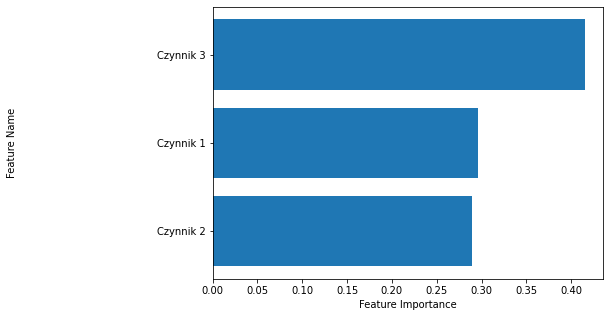

In [306]:
# Inicjalizacja modelu Lasu Losowego
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Trenowanie modelu
rf_classifier.fit(components_df, y_train)

# Wybór najbardziej istotnych cech
wartosci = rf_classifier.feature_importances_
kategorie=components_df.columns

niezerowe_wartosci = [x for x in wartosci if x != 0]
niezerowe_kategorie = [kategorie[i] for i, x in enumerate(wartosci) if x != 0]

#sortowanie
sorted_niezerowe_wartosci, sorted_niezerowe_kategorie = zip(*sorted(zip(niezerowe_wartosci, niezerowe_kategorie), reverse=False))

# Tworzenie wykresu słupkowego z niezerowymi wartościami
fig, ax = plt.subplots(figsize=(7,5))
plt.barh(sorted_niezerowe_kategorie, sorted_niezerowe_wartosci)

plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
ax.yaxis.set_label_coords(-0.5, 0.5)
plt.show()

In [308]:
y_pred = rf_classifier.predict(X_test)

# Obliczenie dokładności klasyfikacji
accuracy = accuracy_score(y_test, y_pred)
print("Dokładność klasyfikacji:", accuracy)

# Obliczenie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMacierz pomyłek:")
print(conf_matrix)

Dokładność klasyfikacji: 0.7727272727272727

Macierz pomyłek:
[[10  4]
 [ 1  7]]


c:\Users\dorot\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

